<font color='orange'>**DSBDAL Ass. 4 - Data Analytics I**</font><br/>

##### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (http://lib.stat.cmu.edu/datasets/boston). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.The objective is to predict the value of prices of the house using the given features.

#### **0. Loading the Dataset**

In [166]:
lis = []
data = None
with open('4_data.txt') as f:
    data = f.readlines()
for i in range(0,len(data)-1,2):
    a = [float(i) for i in data[i].split()]
    b = [float(i) for i in data[i+1].split()]
    lis.append(a+b)

In [167]:
import pandas as pd
df = pd.DataFrame(lis, columns=["CrimeRate","ZonedLand","NonRetailAcres","CharlesRiverDummyVar","NitricOxideConc","Rooms/Dwelling",
"OwnerOccupiedUnits<1940","EmploymentCentreDistance","RadialHighwaysIndex","PropertyTaxRate/10K",
"PupilTeacherRatio","BlacksProportion","LowerStatus%","MEDVOwnerHomes-10K"])

#### **1. Exploration**

In [168]:
df.shape

(506, 14)

In [169]:
df.head()

,CrimeRate,ZonedLand,NonRetailAcres,CharlesRiverDummyVar,NitricOxideConc,Rooms/Dwelling,OwnerOccupiedUnits<1940,EmploymentCentreDistance,RadialHighwaysIndex,PropertyTaxRate/10K,PupilTeacherRatio,BlacksProportion,LowerStatus%,MEDVOwnerHomes-10K
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [170]:
df.dtypes

CrimeRate                   float64
ZonedLand                   float64
NonRetailAcres              float64
CharlesRiverDummyVar        float64
NitricOxideConc             float64
Rooms/Dwelling              float64
OwnerOccupiedUnits<1940     float64
EmploymentCentreDistance    float64
RadialHighwaysIndex         float64
PropertyTaxRate/10K         float64
PupilTeacherRatio           float64
BlacksProportion            float64
LowerStatus%                float64
MEDVOwnerHomes-10K          float64
dtype: object

In [171]:
df.isna().sum()

CrimeRate                   0
ZonedLand                   0
NonRetailAcres              0
CharlesRiverDummyVar        0
NitricOxideConc             0
Rooms/Dwelling              0
OwnerOccupiedUnits<1940     0
EmploymentCentreDistance    0
RadialHighwaysIndex         0
PropertyTaxRate/10K         0
PupilTeacherRatio           0
BlacksProportion            0
LowerStatus%                0
MEDVOwnerHomes-10K          0
dtype: int64

In [172]:
df.describe()

,CrimeRate,ZonedLand,NonRetailAcres,CharlesRiverDummyVar,NitricOxideConc,Rooms/Dwelling,OwnerOccupiedUnits<1940,EmploymentCentreDistance,RadialHighwaysIndex,PropertyTaxRate/10K,PupilTeacherRatio,BlacksProportion,LowerStatus%,MEDVOwnerHomes-10K
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### **2. Visualization using Boxplot - for the numeric features**

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
import numpy as np
cols = np.array(df.columns)

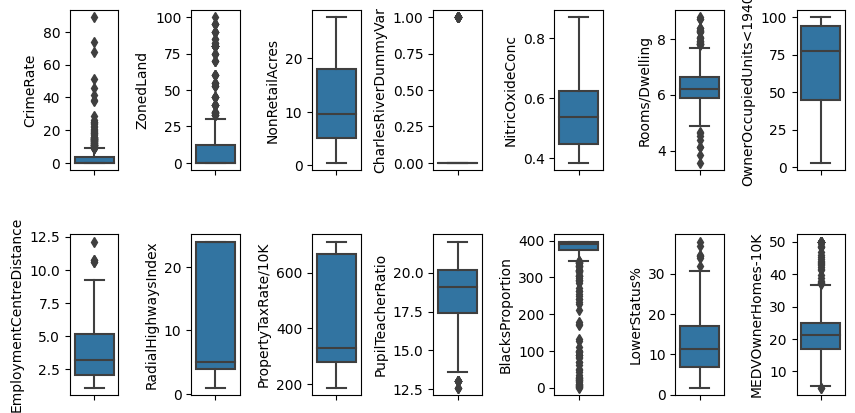

In [175]:
fig, axes = plt.subplots(2,7, figsize=(10,5))

for i,col in enumerate(cols[:7]):
    sns.boxplot(ax=axes[0,i], y=col, data=df)
for i,col in enumerate(cols[7:]):
    sns.boxplot(ax=axes[1,i], y=col, data=df)
    
plt.subplots_adjust(wspace=1.5,hspace=0.4);

#### **3. Finding the Outliers**

In [176]:
q1,q3 = df.quantile(0.25), df.quantile(0.75)
iqr = q3-q1
lb,ub = (q1-3*iqr), (q3+3*iqr)
outliers = ((df<lb)|(df>ub))

#### **4. Missing Values**

In [178]:
df.isna().sum()

CrimeRate                   0
ZonedLand                   0
NonRetailAcres              0
CharlesRiverDummyVar        0
NitricOxideConc             0
Rooms/Dwelling              0
OwnerOccupiedUnits<1940     0
EmploymentCentreDistance    0
RadialHighwaysIndex         0
PropertyTaxRate/10K         0
PupilTeacherRatio           0
BlacksProportion            0
LowerStatus%                0
MEDVOwnerHomes-10K          0
dtype: int64

#### **5. Visualization - Correlation Heatmap**
##### (To drop features not correlated with target (MEDV) + highly correlated features)

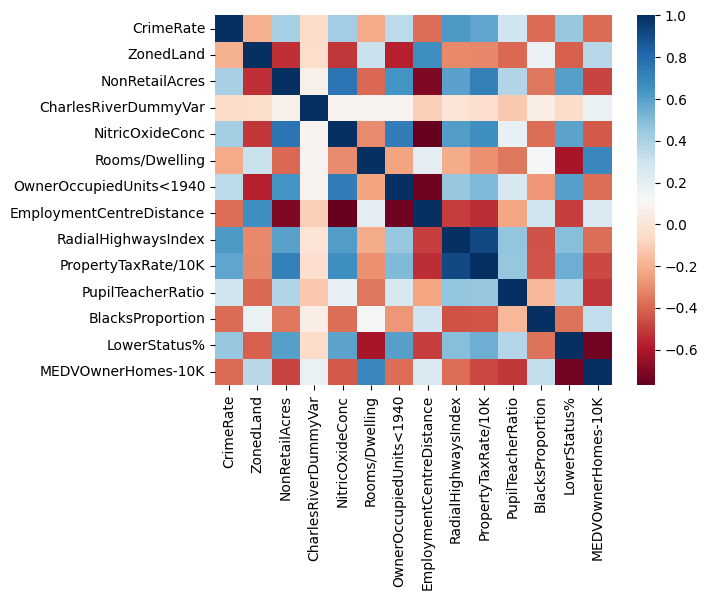

In [224]:
sns.heatmap(df.corr(), cmap="RdBu");

#### **6. Linear Regression Model**

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=32, shuffle=True)

In [220]:
train_x, train_y = train.drop(['MEDVOwnerHomes-10K'], axis='columns'), train['MEDVOwnerHomes-10K']
test_x, test_y = test.drop(['MEDVOwnerHomes-10K'], axis='columns'), test['MEDVOwnerHomes-10K']

In [221]:
lr = LinearRegression()

In [222]:
lr.fit(train_x, train_y)

LinearRegression()

In [226]:
print('Accuracy = ',lr.score(test_x,test_y))

Accuracy =  0.7067408832236093
